# Convex Hull with Graham's Algorithm
Michael Macfarlan

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random


1. Let 𝑝1 be the point with the smallest 𝑦-coordinate (and smallest 𝑥-coordinate if multiple points have the same minimum-𝑦 coordinate) 𝑂(𝑛)
2. Add 𝑝1 to the convex hull 𝐶 (represented as a stack)  𝑂(1)
3. Sort all of the points based on their angle relative to 𝑝1  𝑂(𝑛 log 𝑛)
4. For each of the points 𝑝𝑖 in sorted order:  𝑂(1)
- Try adding 𝑝𝑖 to the convex hull 𝐶
- If adding 𝑝𝑖 makes 𝐶 non-convex, then remove the last component of 𝐶 and repeat this check

Runtime: 𝑂(𝑛 log 𝑛)

In [23]:
def angle(p1, p2):
    return np.arctan2(p2[1] - p1[1], p2[0] - p1[0])

def leftturn(p1, p2, p3):
    return (p2[0] - p1[0]) * (p3[1] - p1[1]) - (p2[1] - p1[1]) * (p3[0] - p1[0]) > 0


def grahams(original_points):
    # copy the points to preserve the original list
    points = original_points[:]
    
    # find the point with the smallest y coordinate
    start = min(points, key=lambda p: (p[1], p[0]))
    points.remove(start)

    # sort the points by the angle with the start point
    sorted_points = sorted(points, key=lambda p: angle(start, p))

    # initialize hull with start point
    hull = [start]

    # add points to the hull
    for point in sorted_points:
        while len(hull) > 1 and not leftturn(hull[-2], hull[-1], point):
            hull.pop()  # pop if NOT a left turn, which means it is a right turn.
        hull.append(point)

    print("Start point:", start)
    print("Sorted points after angle sorting:", sorted_points)
    print("Final Hull:", hull)

    return hull


Start point: (53, 5)
Sorted points after angle sorting: [(93, 9), (96, 12), (77, 18), (100, 38), (62, 13), (79, 32), (74, 27), (87, 42), (64, 17), (92, 51), (72, 28), (73, 30), (66, 33), (85, 80), (90, 100), (78, 81), (69, 57), (63, 42), (70, 75), (61, 45), (62, 51), (68, 90), (61, 56), (60, 71), (55, 40), (49, 97), (49, 40), (41, 90), (42, 69), (37, 90), (40, 65), (38, 70), (31, 93), (33, 65), (36, 56), (26, 77), (26, 70), (15, 70), (11, 76), (7, 70), (0, 78), (37, 23), (12, 45), (36, 17), (30, 18), (39, 12), (8, 24), (11, 10), (1, 11)]
Final Hull: [(53, 5), (93, 9), (96, 12), (100, 38), (90, 100), (49, 97), (31, 93), (0, 78), (1, 11)]
All hull points are in the original list.


### Testing

In [ ]:
# create points
random.seed(0)
points = [(random.randint(0, 100), random.randint(0, 100)) for _ in range(50)]

In [ ]:
# call the function with the original points
hull = grahams(points)

# Verify that all points in the hull are from the original points list
if all(point in points for point in hull):
    print("All hull points are in the original list.")
else:
    print("There are hull points not present in the original list.")

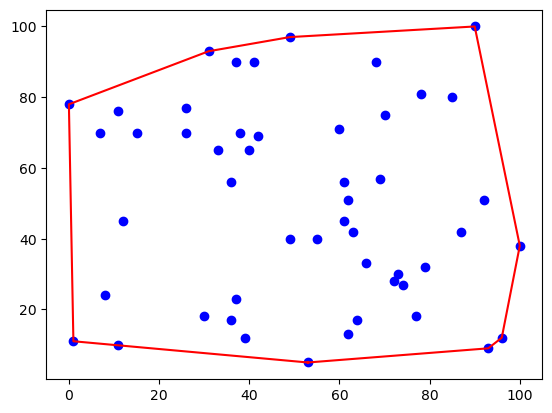

In [24]:
# decompose the list of tuples into two lists, one for x and one for y
x, y = zip(*points)
hx, hy = zip(*hull + [hull[0]])  # add the first point to the end to close the hull

# plot original points in blue
plt.scatter(x, y, color='blue')
# draw hull lines in red
plt.plot(hx, hy, 'r-')
plt.show()